Focus on how linear and non-linear models can be learned using matrix inverses. Discuss the relationship between model complexity (e.g., polynomial degree) and the amount of data needed to accurately train these models with matrix inverses.

# Linear models

In the below code snippet we have three data sets with two 2-d points each. The first component (x) of each [x, y] is the input whereas the second component (y) is the label.  
We want to rewrite it to the form $y = mx + b$ or even better using linear algebra to the format $y = \begin{bmatrix}x & 1\end{bmatrix}\begin{bmatrix}m \\ b\end{bmatrix}$ for y-intercept $b$ and slope $m$. Since the line is defined by two points we can consider these ($m\ \&\ b$) our unknowns and solve as a system of (2) linear equations:  

$\begin{bmatrix}
    x_1 & 1 \\
    x_2 & 1 \\
\end{bmatrix}
\begin{bmatrix}
    m \\ b
\end{bmatrix} = \begin{bmatrix}
    y_1 \\ y_2
\end{bmatrix}$

The first part we have stacked a column of 1s since we can consider this $x^0 = 1$ whereas $x_1$ and $x_2$ are both bases with exponents of 1.

In [79]:
import numpy as np
import matplotlib.pyplot as plt

dataset_1 = np.array([[10, 2], [9, 6]])
dataset_2 = np.array([[5, 1], [7, 5]])
dataset_3 = np.array([[4, 2], [5, 3]])

Below we will convert each dataset to a column vector (matrix of dimensionality $2 \times 1$) for the input values, a $1 \times 2$ dimensional vector for the labels and then construct design matrices but stacking an extra column of ones on the input values such that we have a two by two matrix. We can then take the inverse design matrix and multiply it with the labels to get the weights for the model for each dataset.  
The weights for each dataset is equivalent to $a$ and $b$ in the linear equation $ax + b = y$ for input values $x$ and labels $y$ also known as the slope and y-intercept, respectively.

X1 = 
 [[10]
 [ 9]]
y1 = [2 6]
Design Matrix for Dataset 1:
 [[10.  1.]
 [ 9.  1.]]
Weights for Dataset 1: [-4. 42.]
Weights for Dataset 2: [ 2. -9.]
Weights for Dataset 3: [ 1. -2.]


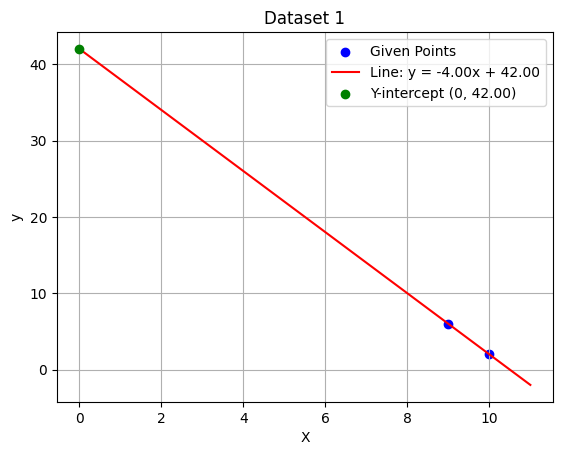

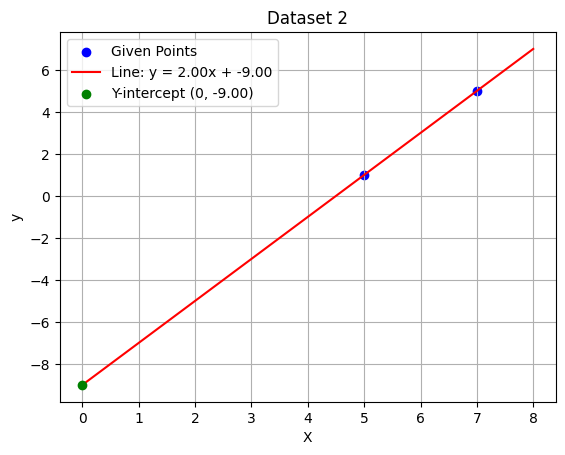

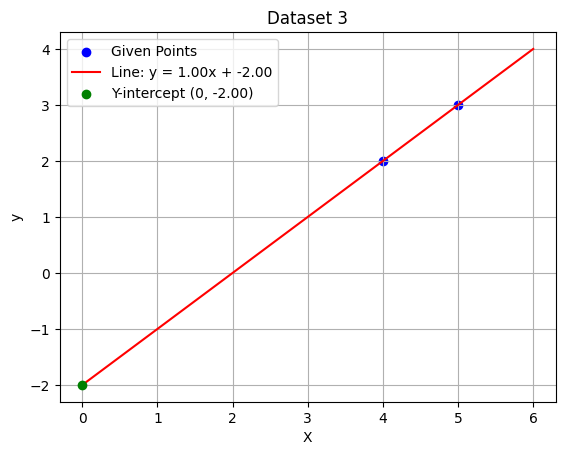

In [80]:
def separate_inputs_labels(dataset):
    """
    This function takes a dataset as input and returns the inputs and labels.
    
    Parameters:
    dataset (numpy array): The dataset to be separated.
    
    Returns:
    X (numpy array): The input matrix.
    y (numpy array): The labels array.
    """
    
    X = dataset[:,:1]
    y = dataset[:,1]
    # return the results as a tuple
    return X, y


# construct the design matrix    
X1, y1 = separate_inputs_labels(dataset_1)
X1_design = np.column_stack([X1, np.ones(2)])
X2, y2 = separate_inputs_labels(dataset_2)
X2_design = np.column_stack([X2, np.ones(2)])
X3, y3 = separate_inputs_labels(dataset_3)
X3_design = np.column_stack([X3, np.ones(2)])

# Print the datasets
print("X1 = \n",X1)
print("y1 =", y1)
print("Design Matrix for Dataset 1:\n", X1_design)

weights1 = np.linalg.inv(X1_design) @ y1
weights2 = np.linalg.inv(X2_design) @ y2
weights3 = np.linalg.inv(X3_design) @ y3

print("Weights for Dataset 1:", weights1)
print("Weights for Dataset 2:", weights2)
print("Weights for Dataset 3:", weights3)

# Function to plot data points and fitted line
def plot_model(X, y, weights, dataset_name):
    # Plot the data points
    plt.scatter(X, y, color='blue', label='Given Points')
    
    # Extend x_vals range to include zero for correct y-intercept visualization
    x_vals = np.linspace(0, max(X) + 1, 100)
    y_vals = weights[0] * x_vals + weights[1]
    
    # Plot the fitted line
    plt.plot(x_vals, y_vals, color='red', label=f'Line: y = {weights[0]:.2f}x + {weights[1]:.2f}')
    
    # Plot the y-intercept
    plt.scatter(0, weights[1], color='green', zorder=5, label=f'Y-intercept (0, {weights[1]:.2f})')
    
    # Add title and labels
    plt.title(dataset_name)
    plt.xlabel('X')
    plt.ylabel('y')
    plt.legend()
    plt.grid(True)
    plt.show()
    
# Function to plot data points and fitted quadratic model
def plot_quadratic_model(X, y, weights):
    # Plot the data points
    plt.scatter(X, y, color='blue', label='Given Points')
    
    # Extend x_vals range to include zero for correct visualization
    x_vals = np.linspace(0, max(X) + 1, 100)
    y_vals = weights[0] * x_vals**2 + weights[1] * x_vals + weights[2]
    
    # Plot the fitted polynomial
    plt.plot(x_vals, 
             y_vals, 
             color='red', 
             label=f'Poly: y = {weights[0]:.2f}x^2 + {weights[1]:.2f}x + {weights[2]:.2f}')
    
    # Plot the y-intercept
    plt.scatter(0, weights[2], color='green', zorder=5, label=f'Y-intercept (0, {weights[2]:.2f})')
    
    # Add title and labels
    plt.title('Quadratic Model')
    plt.xlabel('X')
    plt.ylabel('y')
    plt.legend()
    plt.grid(True)
    plt.show()

plot_model(X1, y1, weights1, 'Dataset 1')
plot_model(X2, y2, weights2, 'Dataset 2')
plot_model(X3, y3, weights3, 'Dataset 3')


We cannot determine the determinant or calculate the inverse matrix for a non-square matrix which happens because we have more data points (5) than dimensions / model parameters (2) in the below $dataset\ 4$.  
The above method is a way of solving a system of linear equations which we know requires a linear equation per unknown/model parameter and with more, we can't guarantee a solution like in this case. Attempting to complete the same for a dataset with 5 points it ends in a failure when inverting the design matrix since the matrix is not square. (Same error if we attempt to calculate the determinant)  

Instead we can solve it as an overdetermined set of linear equations, essentially swapping out $weights = X^{-1} y$ with $weights = (X^T X)^{-1} X^T y$ for the design matrix $X$.

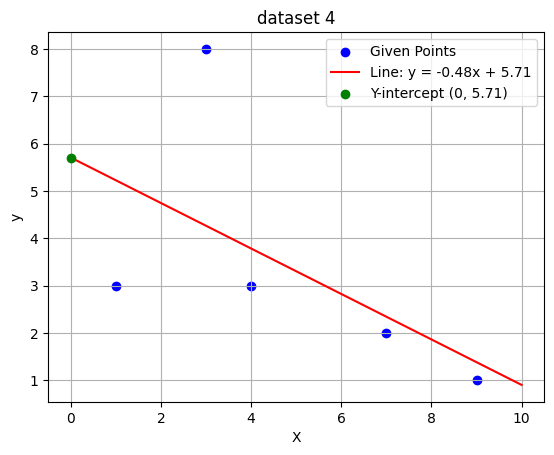

In [81]:
dataset_4 = np.array([[9, 1], [7, 2],[3, 8], [1, 3],[4, 3]])

X4, y4 = separate_inputs_labels(dataset_4)
X4_design = np.column_stack([X4, np.ones(5)])

weights4 = np.linalg.inv(X4_design.T @ X4_design) @ X4_design.T @ y4

plot_model(X4, y4, weights4, "dataset 4")

## Non-linear models

We can solve polynomial models similarly, though since we use the form $y = w_0 + w_1 * x + w_2 * x^2$ (essentially added the last part $w_2 * x^2$ to our linear regression from before) we must know have three columns in the design matrix for the 2nd order polynomial following the form
$\begin{bmatrix}
    x^2 & x^1 & x^0 \\
    x^2 & x^1 & x^0 \\
    x^2 & x^1 & x^0 \\
\end{bmatrix}$
for some different $x$-values where we know a data point for their y-value. The last column, $x^0$, is always equal to 1 (like our linear model from before).  
Then we can continue in the same fashion as before, even for an overdetermined model. We could extend the below code to polynomials of a higher degree by adding an extra column

Quadratic design matrix=
 [[ 1.  1.  1.]
 [ 4.  2.  1.]
 [ 9.  3.  1.]
 [16.  4.  1.]
 [25.  5.  1.]]
Quadratic model weights=
 [0.5 0.1 1.2]


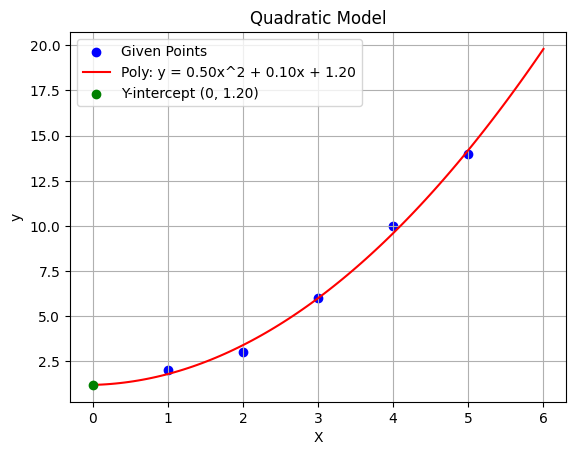

[[ 14.  100.6]
 [ 15.  115.2]]


In [82]:
quadratic_dataset = np.array([[1, 2], 
                                [2, 3], 
                                [3, 6],
                                [4, 10],
                                [5, 14]])

q_X, q_y = separate_inputs_labels(quadratic_dataset)
Xq_design = np.column_stack([q_X ** 2, q_X, np.ones(len(q_X))]) # q_X ** 2 is elementwise multiplication equivalent to x^2

print("Quadratic design matrix=\n", Xq_design)

q_weights = np.linalg.inv(Xq_design.T @ Xq_design) @ Xq_design.T @ q_y

print("Quadratic model weights=\n", q_weights)

plot_quadratic_model(q_X, q_y, q_weights)

prediction_x = np.array([14, 15])
prediction_y = np.column_stack([prediction_x ** 2, prediction_x, np.ones(len(prediction_x))]) @ q_weights
print(np.column_stack([prediction_x, prediction_y]))

## Relationship between data points and polynomial degree

1. We need at least n + 1 data points to solve a system of linear equations for n unknowns
2. We are very sensitive to noise for the minimum number of data points causing overfitting
    - (meaning if we create a 5th order polynomial because we have 6 data points)
3. We need proportionally more data the larger polynomial degree we train